In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
df['species'] = encoder.fit_transform(df['species'])

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.drop(['sepal_width','petal_width'],axis=1,inplace=True)

In [10]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
from sklearn.linear_model import LogisticRegression

In [15]:
# we need to specify 'multinomial' over there  for multiclass classification
clf = LogisticRegression(multi_class='multinomial')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [23]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
query = np.array([[3.8,4.7]])
clf.predict_proba(query)
# checking the probability for being that category

array([[0.00461162, 0.14844861, 0.84693978]])

In [27]:
# actual prediction
clf.predict(query)

array([2])

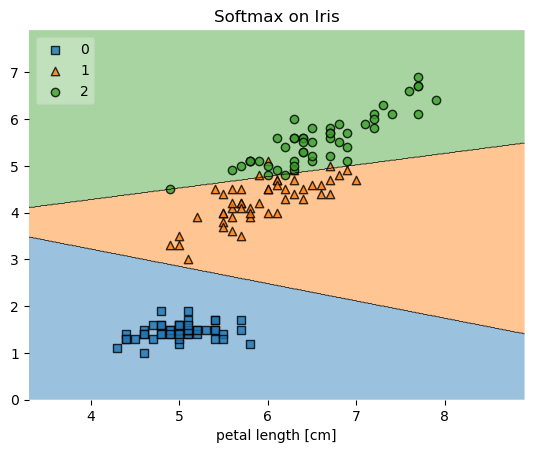

In [28]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()